In [1]:
import pandas as pd
data = pd.read_csv('lefty_revised.csv')

In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [14]:
data.drop(columns=['game_date'], inplace=True)

In [23]:
data.drop(columns=['type'], inplace=True)

In [24]:
data.head()

,pitch_name,release_speed,events,description,effective_speed,release_spin_rate,vx0,vy0,vz0,ax,ay,az,pfx_x,pfx_z,bauer_units
0,Cutter,90.4,6,4,90.193,2449.0,-7.065,-131.512,-3.298,-3.334,27.861,-30.520,-0.394417,0.329000,27.090708
1,Slider,81.5,0,0,81.301,2293.0,-7.940,-118.390,-2.930,-0.977,18.714,-31.765,-0.224633,0.232967,28.134969
2,Curveball,77.1,0,0,75.063,2543.0,-6.290,-112.149,-2.442,-4.252,25.153,-42.517,-0.607342,-1.004000,32.983139
3,Cutter,87.6,0,6,86.856,2513.0,-5.742,-127.487,-2.031,0.472,27.321,-28.650,-0.089642,0.502433,28.687215
4,Cutter,86.2,0,6,86.030,2422.0,-6.874,-125.377,-2.652,-1.359,24.380,-28.309,-0.248292,0.539700,28.097448


In [25]:
#label encoding events and descriptions
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['events'] = encoder.fit_transform(data['events'])
data['description']= encoder.fit_transform(data['description'])

In [26]:
#not going to use test data this time around
test_data = data.loc[100:750000:60]

In [27]:
test_data.shape

(12442, 15)

In [28]:
X = test_data.drop('pitch_name', axis =1)
y = test_data.pitch_name

In [54]:
#train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [30]:
#performing a logistic regression to see the baseline
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class= 'multinomial', solver='newton-cg', C=1e5)
classifier

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

In [31]:
classifier.fit(X_train,y_train)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

In [32]:
#got higher scores
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7081770442610653
Testing Data Score: 0.7135969141755063


In [43]:
predictions = classifier.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report( y_test, predictions))

                 precision    recall  f1-score   support

2-Seam Fastball       0.49      0.46      0.48       367
4-Seam Fastball       0.80      0.90      0.85      1103
       Changeup       0.83      0.92      0.87       411
      Curveball       0.78      0.80      0.79       263
         Cutter       0.53      0.42      0.47       144
  Knuckle Curve       0.63      0.19      0.29        63
         Sinker       0.41      0.26      0.32       350
         Slider       0.70      0.78      0.74       389
   Split Finger       0.40      0.10      0.15        21

      micro avg       0.71      0.71      0.71      3111
      macro avg       0.62      0.54      0.55      3111
   weighted avg       0.69      0.71      0.69      3111



In [35]:
#importing SGD cal
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(n_iter= 10,)
SGD.fit(X_train,y_train)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=10, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
SGD.score(X_test, y_test)

0.46383799421407906

In [42]:
#not bad, might want to look into improving model
SGDpredict = SGD.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report( y_test, SGDpredict))

                 precision    recall  f1-score   support

2-Seam Fastball       0.00      0.00      0.00       367
4-Seam Fastball       0.48      0.99      0.65      1103
       Changeup       0.58      0.23      0.33       411
      Curveball       0.37      0.96      0.54       263
         Cutter       0.00      0.00      0.00       144
  Knuckle Curve       0.00      0.00      0.00        63
         Sinker       0.00      0.00      0.00       350
         Slider       0.00      0.00      0.00       389
   Split Finger       0.00      0.00      0.00        21

      micro avg       0.46      0.46      0.46      3111
      macro avg       0.16      0.24      0.17      3111
   weighted avg       0.28      0.46      0.32      3111



/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
#trying gradient boosting
#definitely the best so far
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [39]:
print(f"R-squared = {model.score(X_train,y_train)}")

R-squared = 0.8194191404994106


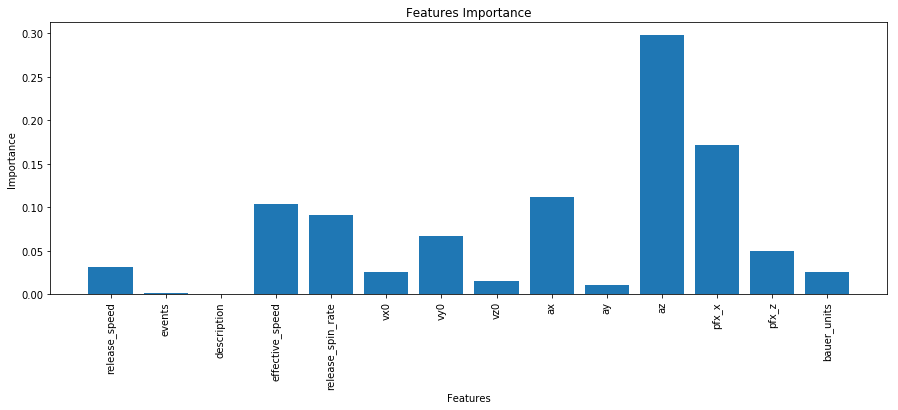

In [41]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(15, 5))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
labels = list(X_train)
plt.xticks(range(len(model.feature_importances_)), labels, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()

In [44]:
treepredict = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, treepredict))

                 precision    recall  f1-score   support

2-Seam Fastball       0.49      0.47      0.48       367
4-Seam Fastball       0.81      0.91      0.86      1103
       Changeup       0.83      0.89      0.86       411
      Curveball       0.80      0.79      0.80       263
         Cutter       0.52      0.51      0.52       144
  Knuckle Curve       0.49      0.37      0.42        63
         Sinker       0.46      0.29      0.36       350
         Slider       0.72      0.72      0.72       389
   Split Finger       0.56      0.24      0.33        21

      micro avg       0.72      0.72      0.72      3111
      macro avg       0.63      0.58      0.59      3111
   weighted avg       0.70      0.72      0.71      3111



In [47]:
#have to encode Y for SGD regressor
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y_encode = encoder.fit_transform(y)

In [48]:
#train test split again
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y_encode, random_state=1)

In [49]:
from sklearn.linear_model import SGDRegressor
modeling = SGDRegressor(max_iter=1000, tol=1e-3)
modeling.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [50]:
#not good
modeling.score(X_train, y_train)

-2.0318553619103415e+29

In [64]:
#going to try kernal approx
from sklearn import svm
clf = svm.SVC(gamma='scale',decision_function_shape='ovo')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
clf.score(X_train, y_train)

0.6738827564033866

In [66]:
clf_predict = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_predict))

                 precision    recall  f1-score   support

2-Seam Fastball       0.42      0.41      0.41       367
4-Seam Fastball       0.72      0.94      0.82      1103
       Changeup       0.72      0.86      0.79       411
      Curveball       0.80      0.75      0.78       263
         Cutter       0.52      0.23      0.32       144
  Knuckle Curve       0.00      0.00      0.00        63
         Sinker       0.34      0.04      0.07       350
         Slider       0.63      0.77      0.69       389
   Split Finger       0.00      0.00      0.00        21

      micro avg       0.67      0.67      0.67      3111
      macro avg       0.46      0.44      0.43      3111
   weighted avg       0.61      0.67      0.62      3111



/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [69]:
#train test split again
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y_encode, random_state=1)

In [70]:
#going to try kernal approx
#important to SCALE!!!!
#https://scikit-learn.org/stable/modules/svm.html#svm
from sklearn import svm
clfSVR = svm.SVR()
clfSVR.fit(X_train, y_train)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
#not great
clfSVR.score(X_train, y_train)

0.4105425115024892